In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv('brain_tumor_dataset.csv').drop(columns=['Patient_ID'])
data.head()

NameError: name 'pd' is not defined

In [ ]:
n_data = data.dropna()
n_data

Age  Gender Tumor_Type  Tumor_Size  Location        Histology Stage  \
0       73    Male  Malignant    5.375612  Temporal      Astrocytoma   III   
1       26    Male     Benign    4.847098  Parietal     Glioblastoma    II   
2       31    Male     Benign    5.588391  Parietal       Meningioma     I   
3       29    Male  Malignant    1.436600  Temporal  Medulloblastoma    IV   
4       54  Female     Benign    2.417506  Parietal     Glioblastoma     I   
...    ...     ...        ...         ...       ...              ...   ...   
19995   21    Male  Malignant    9.612013  Parietal  Medulloblastoma   III   
19996   32  Female     Benign    1.543560  Temporal       Meningioma   III   
19997   57  Female     Benign    3.618634  Temporal  Medulloblastoma     I   
19998   68    Male  Malignant    8.519086  Parietal     Glioblastoma   III   
19999   61    Male     Benign    9.716768  Temporal  Medulloblastoma     I   

           Symptom_1      Symptom_2      Symptom_3 Radiation_Treatment  \
0      Vision Issues       Seizures       Seizures                  No   
1           Headache       Headache         Nausea                 Yes   
2      Vision Issues       Headache       Seizures                  No   
3      Vision Issues       Seizures       Headache                 Yes   
4           Headache       Headache       Seizures                  No   
...              ...            ...            ...                 ...   
19995       Seizures         Nausea  Vision Issues                  No   
19996       Headache       Headache  Vision Issues                 Yes   
19997       Seizures  Vision Issues         Nausea                  No   
19998       Seizures       Headache  Vision Issues                 Yes   
19999  Vision Issues       Seizures         Nausea                  No   

      Surgery_Performed Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                    No           No      51.312579           0.111876   
1                   Yes          Yes      46.373273           2.165736   
2                    No           No      47.072221           1.884228   
3                    No          Yes      51.853634           1.283342   
4                    No          Yes      54.708987           2.069477   
...                 ...          ...            ...                ...   
19995                No          Yes      58.229662           0.353806   
19996               Yes           No      77.706856           2.341074   
19997                No          Yes      89.543803           2.332881   
19998               Yes          Yes      83.306781           2.387202   
19999                No           No      47.433468           2.464077   

      Family_History MRI_Result Follow_Up_Required  
0                 No   Positive                Yes  
1                Yes   Positive                Yes  
2                 No   Negative                 No  
3                Yes   Negative                 No  
4                 No   Positive                Yes  
...              ...        ...                ...  
19995             No   Negative                Yes  
19996             No   Positive                 No  
19997             No   Positive                Yes  
19998             No   Positive                 No  
19999            Yes   Negative                Yes  

[20000 rows x 18 columns]

In [ ]:
x = n_data.drop(columns=['Follow_Up_Required'])
y = n_data['Follow_Up_Required']

In [ ]:
n_data['Follow_Up_Required'] =  [1 if i == 'Yes' else 0 for i in n_data['Follow_Up_Required']]

Text(0, 0.5, 'Average Follow-Up Rate')

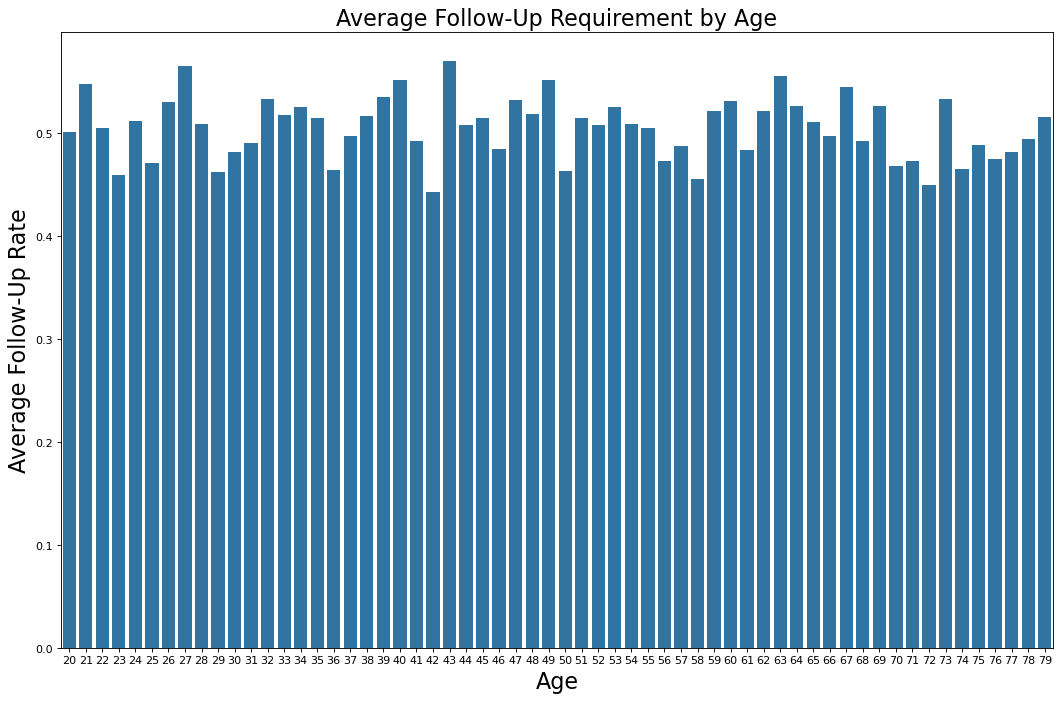

In [ ]:
groups = n_data[['Age', 'Follow_Up_Required']]
group_data = groups.groupby('Age')['Follow_Up_Required'].mean().sort_values()

group_data = group_data.sort_values()

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.barplot(x=group_data.index, y=group_data.values, ax=ax)

ax.set_title('Average Follow-Up Requirement by Age', size=20)
ax.set_xlabel('Age', size=20) 
ax.set_ylabel('Average Follow-Up Rate', size=20)

Text(0, 0.5, 'Count of Follow-Ups Required')

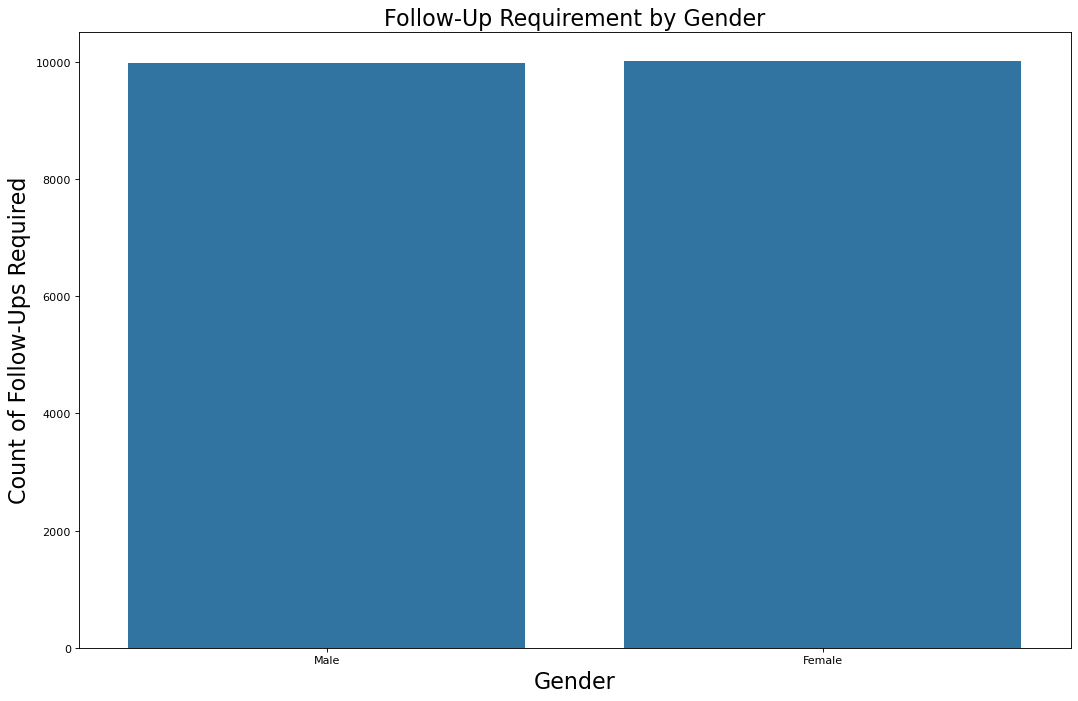

In [ ]:
groups = n_data[['Gender', 'Follow_Up_Required']]
group_data = groups.groupby('Gender')['Follow_Up_Required'].count()

group_data = group_data.sort_values()

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.barplot(x=group_data.index, y=group_data.values, ax=ax)

ax.set_title('Follow-Up Requirement by Gender', size=20)
ax.set_xlabel('Gender', size=20) 
ax.set_ylabel('Count of Follow-Ups Required', size=20)

In [ ]:
from category_encoders import BinaryEncoder

categorical_features = [col for col in ['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage', 
                                        'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 
                                        'Surgery_Performed', 'Chemotherapy', 'Family_History', 
                                        'MRI_Result', 'Follow_Up_Required'] if col in x.columns]

encoder = BinaryEncoder()
if categorical_features:
    x_encoded = encoder.fit_transform(x[categorical_features])
    x = x.drop(columns=categorical_features)
    x = pd.concat([x, x_encoded], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=45)

In [ ]:
y.value_counts()

Follow_Up_Required
Yes    10101
No      9899
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

Follow_Up_Required
Yes    10101
No     10101
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from joblib import dump,load
import graphviz

dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)

export_graphviz(dcs, out_file="tree.dot", filled=True, feature_names=x_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# dump(dcs,"decision_tree_model.joblib")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

prediction = dcs.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='micro')

print(f"Accuracy: {accuracy * 100}%\nPrecision: {precision * 100}%")

Accuracy: 49.76%
Precision: 49.76%
